--- Starting Training ---
Epoch 1/500 | MSE: 0.668924 | Acc: 51.50%
Epoch 51/500 | MSE: 0.422085 | Acc: 75.25%
Epoch 101/500 | MSE: 0.293718 | Acc: 83.25%
Epoch 151/500 | MSE: 0.256650 | Acc: 85.50%
Epoch 201/500 | MSE: 0.228300 | Acc: 87.75%
Epoch 251/500 | MSE: 0.206092 | Acc: 89.50%
Epoch 301/500 | MSE: 0.188449 | Acc: 90.50%
Epoch 351/500 | MSE: 0.174207 | Acc: 90.75%
Epoch 401/500 | MSE: 0.162529 | Acc: 91.50%
Epoch 451/500 | MSE: 0.152813 | Acc: 91.75%
Epoch 500/500 | MSE: 0.144776 | Acc: 92.25%

--- Testing on test1.csv data ---

Test Results -> Cost: 0.158683 | Accuracy: 90.00%
Model parameters saved to results\d1_h10_lr0.1_e500.csv
Plot saved to results\d1_h10_lr0.1_e500.png


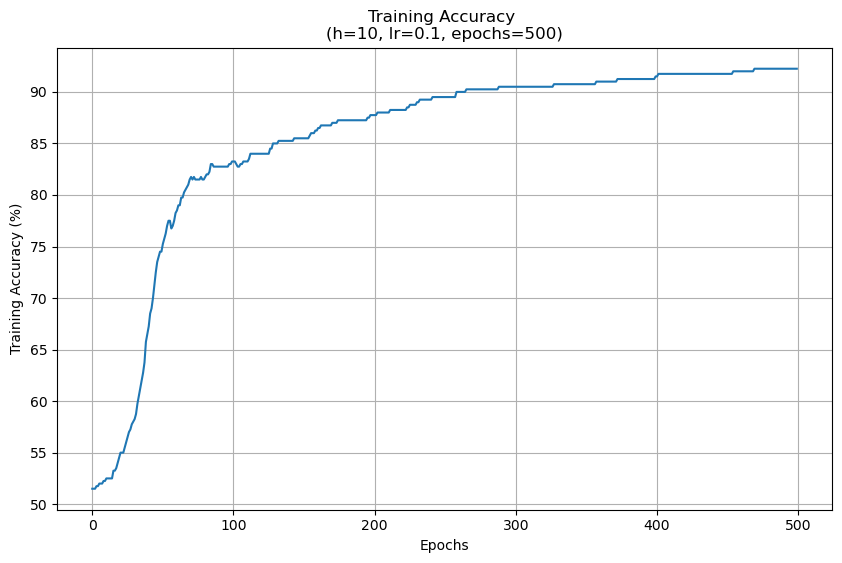

In [ ]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt

class MyNeuralNetwork:

    def __init__(self, input_size, hidden_size, output_size, 
                 learning_rate, epochs, save_flag=True):
        
        #seed
        np.random.seed(15)
        
        # Weights and Biases Initialization 
        self.W1 = np.random.randn(hidden_size, input_size)
        self.W2 = np.random.randn(output_size, hidden_size)

        # zero initialization
        # self.b1 = np.zeros((hidden_size, 1))
        # self.b2 = np.zeros((output_size, 1))

        self.b1 = np.random.randn(hidden_size, 1)
        self.b2 = np.random.randn(output_size, 1)

        # Hyperparameters
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.hidden_size = hidden_size

        # metrics
        self.training_costs = []
        self.training_accuracy = []
        self.test_cost = None
        self.test_accuracy = None

        # others
        self.input_size = input_size
        self.output_size = output_size
        self.save_flag = save_flag
        # self.activation_function = activation_function

    
    # activation functions and derivative
    def sigmoid(self, z):
        z = np.clip(z, -500, 500) # Prevent overflow
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        a = self.sigmoid(z)
        return a * (1 - a)
    
    #linear activation function
    def linear(self, z):
        return z
    
    def linear_derivative(self, z):
        return np.ones_like(z)
    
        
    
    # Forward and Backward Pass 
    def forward_pass(self, X):

        # Input to Hidden layer
        Z1 = self.W1 @ X + self.b1
        A1 = self.sigmoid(Z1)
        
        # Hidden to Output layer
        Z2 = self.W2 @ A1 + self.b2
        A2 = self.sigmoid(Z2)
        
        # Cache values for backpropagation.
        cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
        
        return A2, cache

    # mean squared error cost function   
    def mse_cost(self, y, y_hat):
        m = y.shape[1]  # number of samples
        cost = np.sum((y - y_hat) ** 2) / m
        return cost

   
    def back_prop(self, X, y, cache):
        A1 = cache['A1']
        A2 = cache['A2']
        Z1 = cache['Z1']
        Z2 = cache['Z2']
        
        m = y.shape[1]

        # Gradient calc from output layer to hidden layer 
        dEdA2 = 2.0 * (A2 - y) / m
        dA2dZ2 = self.sigmoid_derivative(Z2)
        dEdZ2 = dEdA2 * dA2dZ2
        dEdW2 = dEdZ2 @ A1.T
        dEdb2 = np.sum(dEdZ2, axis=1, keepdims=True)

        # Gradient calc from hidden layer to input layer
        dEdA1 = self.W2.T @ dEdZ2
        dA1dZ1 = self.sigmoid_derivative(Z1)
        dEdZ1 = dEdA1 * dA1dZ1
        dEdW1 = dEdZ1 @ X.T
        dEdb1 = np.sum(dEdZ1, axis=1, keepdims=True)

        grads = {'dEdW1': dEdW1, 'dEdb1': dEdb1,
                 'dEdW2': dEdW2, 'dEdb2': dEdb2}
        return grads
    
    # Gradient descent parameter update
    def update_parameters(self, grads):
        self.W1 -= self.learning_rate * grads['dEdW1']
        self.b1 -= self.learning_rate * grads['dEdb1']
        self.W2 -= self.learning_rate * grads['dEdW2']
        self.b2 -= self.learning_rate * grads['dEdb2']

    def accuracy(self, y, y_hat):
        predictions = np.argmax(y_hat, axis=0)
        labels = np.argmax(y, axis=0)
        accuracy = np.mean(predictions == labels) * 100.0
        return accuracy

    # Train network
    def train(self, X, y, show_prog=True):
        
        print("--- Starting Training ---")
        
        for epoch in range(self.epochs):

            # Forward pass
            y_hat, cache = self.forward_pass(X)

            # Calculate cost and accuracy
            cost = self.mse_cost(y, y_hat)
            acc = self.accuracy(y, y_hat)
            self.training_costs.append(cost)
            self.training_accuracy.append(acc)

            # Backward pass
            grads = self.back_prop(X, y, cache)
            
            # Update parameters
            self.update_parameters(grads)

            # Print progress
            if show_prog and (epoch % max(1, self.epochs // 10) == 0 or epoch == self.epochs - 1):
                print(f"Epoch {epoch+1}/{self.epochs} | MSE: {cost:.6f} | Acc: {acc:.2f}%")

        return self.training_costs, self.training_accuracy
    
    # Test network
    def test(self, X, y):
        print("\n--- Testing on test1.csv data ---")
        y_hat, _ = self.forward_pass(X)
        self.test_cost = self.mse_cost(y, y_hat)
        self.test_accuracy = self.accuracy(y, y_hat)
        print(f"\nTest Results -> Cost: {self.test_cost:.6f} | Accuracy: {self.test_accuracy:.2f}%")
        return self.test_accuracy
    
    
    # save model parameters and performance to CSV
    def save_model_params(self, filename):
        if not self.save_flag:
            return

        # Ensure the directory exists
        os.makedirs(os.path.dirname(filename), exist_ok=True)
        
        with open(filename, 'w', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(['Parameter', 'Value'])
            writer.writerow(['---HYPERPARAMETERS---'])
            writer.writerow(['Learning rate', self.learning_rate])
            writer.writerow(['Epochs', self.epochs])
            writer.writerow(['Hidden units', self.hidden_size])
            writer.writerow(['---PERFORMANCE---'])
            writer.writerow(['Final Training Accuracy', f"{self.training_accuracy[-1]:.2f}%"])
            writer.writerow(['Test Accuracy', f"{self.test_accuracy:.2f}%"])
            writer.writerow(['---WEIGHTS & BIASES---'])
           
            # Flatten arrays for easier storage in CSV
            writer.writerow(['W1', self.W1.flatten().tolist()])
            writer.writerow(['b1', self.b1.flatten().tolist()])
            writer.writerow(['W2', self.W2.flatten().tolist()])
            writer.writerow(['b2', self.b2.flatten().tolist()])

        print(f"Model parameters saved to {filename}")

    # generate and save plots
    def generate_plots(self, filename):

        plt.figure(figsize=(10, 6))
        plt.plot(self.training_accuracy)
        plt.xlabel('Epochs')
        plt.ylabel('Training Accuracy (%)')
        plt.title(f"Training Accuracy \n(h={self.hidden_size}, lr={self.learning_rate}, epochs={self.epochs})")
        plt.grid(True)
        
        if self.save_flag:
            # Ensure the directory exists
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            plt.savefig(filename)
            print(f"Plot saved to {filename}")
        
        plt.show()

    def generate_cost_plot(self, filename):

        plt.figure(figsize=(10, 6))
        plt.plot(self.training_costs)
        plt.xlabel('Epochs')
        plt.ylabel('Training Cost (MSE)')
        plt.title(f"Training Cost\n(h={self.hidden_size}, lr={self.learning_rate}, epochs={self.epochs})")
        plt.grid(True)
        
        if self.save_flag:
            # Ensure the directory exists
            os.makedirs(os.path.dirname(filename), exist_ok=True)
            plt.savefig(filename)
            print(f"Cost plot saved to {filename}")
        
        plt.show()


# run experiments with different parameters
def main(hidden_size = 10, learning_rate = 0.1, epochs = 500,
         save_flag =True, show_plot = True, file_number = 1):
    
    # Create data and results directories if they don't exist
    os.makedirs("data", exist_ok=True)
    os.makedirs("results", exist_ok=True)

    train_file = os.path.join("data", f"train{file_number}.csv")
    test_file = os.path.join("data", f"test{1}.csv")

    if not (os.path.exists(train_file) and os.path.exists(test_file)):
        print(f"Error: Data files not found.")
        print(f"Please make sure '{train_file}' and '{test_file}' are in the correct directory.")
        return

    train_data = np.loadtxt(train_file, delimiter=',', skiprows=1) # skip header
    test_data = np.loadtxt(test_file, delimiter=',', skiprows=1)


    # Split features and labels, and transpose to match input shape
    X_train = train_data[:, :5].T
    Y_train = train_data[:, 5:].T
    X_test = test_data[:, :5].T
    Y_test = test_data[:, 5:].T

    input_size = X_train.shape[0]
    output_size = Y_train.shape[0]


    
    nn = MyNeuralNetwork(input_size=input_size, 
                         hidden_size=hidden_size, 
                         output_size=output_size, 
                         learning_rate=learning_rate, 
                         epochs=epochs,
                         save_flag=save_flag)

    
    nn.train(X_train, Y_train)
    
    test_accuracy = nn.test(X_test, Y_test)

    # Saving Results 
    if save_flag:
        csv_file = os.path.join("results", f"d{file_number}_h{hidden_size}_lr{learning_rate}_e{epochs}.csv")
        plot_file = os.path.join("results", f"d{file_number}_h{hidden_size}_lr{learning_rate}_e{epochs}.png")
        nn.save_model_params(csv_file)
        
        if show_plot:
            nn.generate_plots(plot_file)
            # nn.generate_cost_plot("temp_cost_plot.png")
    
    elif show_plot:
        # Show plot even if not saving
        nn.generate_plots("temp_plot.png")
        # nn.generate_cost_plot("temp_cost_plot.png")

    return nn.training_accuracy, test_accuracy



# trial
if __name__ == "__main__":
    train_accu, test_accu = main()


--- Starting Training ---
Epoch 1/500 | MSE: 0.933867 | Acc: 50.00%
Epoch 51/500 | MSE: 0.868931 | Acc: 50.00%
Epoch 101/500 | MSE: 0.704657 | Acc: 50.00%
Epoch 151/500 | MSE: 0.489066 | Acc: 53.50%
Epoch 201/500 | MSE: 0.377861 | Acc: 84.50%
Epoch 251/500 | MSE: 0.324327 | Acc: 90.25%
Epoch 301/500 | MSE: 0.280668 | Acc: 91.00%
Epoch 351/500 | MSE: 0.244807 | Acc: 93.00%
Epoch 401/500 | MSE: 0.216121 | Acc: 93.75%
Epoch 451/500 | MSE: 0.193485 | Acc: 93.75%
Epoch 500/500 | MSE: 0.175974 | Acc: 93.50%

--- Testing on test1.csv data ---

Test Results -> Cost: 0.188242 | Accuracy: 88.00%
Model parameters saved to results\d1_h5_lr0.1_e500.csv
Hidden layer size: 5 | Final Train accuracy : 93.5 | Test accuracy: 88.0
--- Starting Training ---
Epoch 1/500 | MSE: 0.668924 | Acc: 51.50%
Epoch 51/500 | MSE: 0.422085 | Acc: 75.25%
Epoch 101/500 | MSE: 0.293718 | Acc: 83.25%
Epoch 151/500 | MSE: 0.256650 | Acc: 85.50%
Epoch 201/500 | MSE: 0.228300 | Acc: 87.75%
Epoch 251/500 | MSE: 0.206092 | Acc:

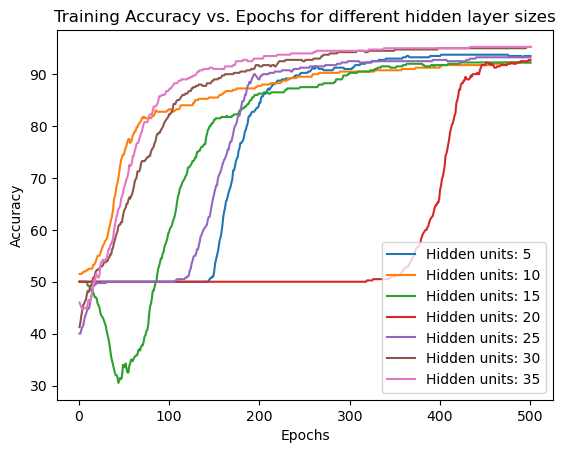

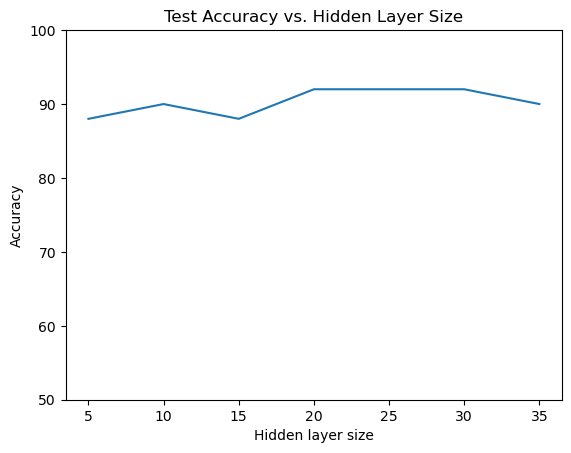

In [ ]:
# Experiments with hidden layer size

# set up parameters for experiments
save = True # Save the trained model parameters
show_each_plot = False # Show each plot during training
file_num = 1 # The dataset to use

# Hyperparameters
learning_rate = 0.1
epochs = 500
hidden_layer_size = np.arange(5, 40, 5)

# Accuracy arrays
train_acc = np.zeros((len(hidden_layer_size), epochs))
test_acc = np.zeros((len(hidden_layer_size), 1))

# Call neural network for each hidden layer size
for i in range(len(hidden_layer_size)):
    train, test = main(hidden_layer_size[i], learning_rate, epochs,
                          save, show_each_plot, file_number=file_num)
    train_acc[i] = train
    test_acc[i] = test
    print(f"Hidden layer size: {hidden_layer_size[i]} | Final Train accuracy : {train[-1]} | Test accuracy: {test}")

# Plot training accuracy vs. epochs
plt.figure("Training Accuracy")
for i in range(len(hidden_layer_size)):
    plt.plot(np.arange(1, epochs+1), train_acc[i], label=f"Hidden units: {hidden_layer_size[i]}")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs. Epochs for different hidden layer sizes")
plt.legend()

# Plot test accuracy vs. hidden layer size
plt.figure("Test Accuracy")
plt.plot(hidden_layer_size, test_acc)
plt.xlabel("Hidden layer size")
plt.ylabel("Accuracy")
plt.ylim(50,100)
plt.title("Test Accuracy vs. Hidden Layer Size")

plt.show()

--- Starting Training ---
Epoch 1/500 | MSE: 0.668924 | Acc: 51.50%
Epoch 51/500 | MSE: 0.422085 | Acc: 75.25%
Epoch 101/500 | MSE: 0.293718 | Acc: 83.25%
Epoch 151/500 | MSE: 0.256650 | Acc: 85.50%
Epoch 201/500 | MSE: 0.228300 | Acc: 87.75%
Epoch 251/500 | MSE: 0.206092 | Acc: 89.50%
Epoch 301/500 | MSE: 0.188449 | Acc: 90.50%
Epoch 351/500 | MSE: 0.174207 | Acc: 90.75%
Epoch 401/500 | MSE: 0.162529 | Acc: 91.50%
Epoch 451/500 | MSE: 0.152813 | Acc: 91.75%
Epoch 500/500 | MSE: 0.144776 | Acc: 92.25%

--- Testing on test1.csv data ---

Test Results -> Cost: 0.158683 | Accuracy: 90.00%
Model parameters saved to results\d1_h10_lr0.1_e500.csv
Learning rate: 0.1 | Final Train accuracy : 92.25 | Test accuracy: 90.0
--- Starting Training ---
Epoch 1/500 | MSE: 0.668924 | Acc: 51.50%
Epoch 51/500 | MSE: 0.293855 | Acc: 83.25%
Epoch 101/500 | MSE: 0.228371 | Acc: 87.75%
Epoch 151/500 | MSE: 0.188475 | Acc: 90.50%
Epoch 201/500 | MSE: 0.162537 | Acc: 91.50%
Epoch 251/500 | MSE: 0.144626 | Acc:

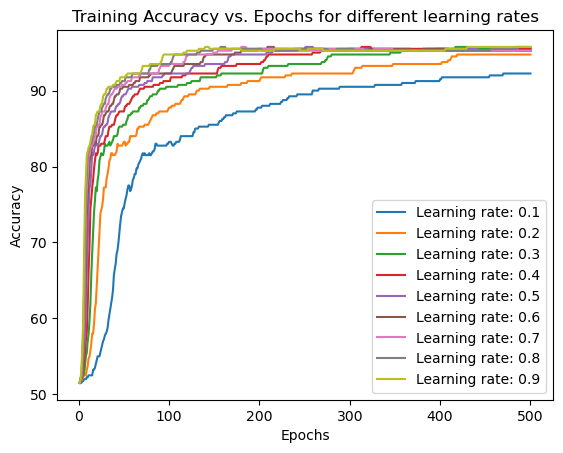

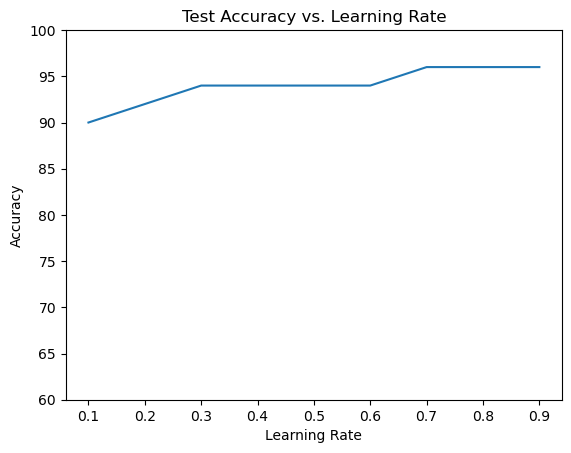

In [ ]:
## Experiments with learning rate

# Hyperparameters
learning_rate = np.arange(0.1, 1, 0.1).round(2)
epochs = 500
hidden_layer_size = 10

# Accuracy arrays
train_acc = np.zeros((len(learning_rate), epochs))
test_acc = np.zeros((len(learning_rate), 1))

# Call neural network for each learning rate
for i in range(len(learning_rate)):
    train, test = main(hidden_layer_size, learning_rate[i], epochs,
                          save, show_each_plot, file_num)
    train_acc[i] = train
    test_acc[i] = test
    print(f"Learning rate: {learning_rate[i]} | Final Train accuracy : {train[-1]} | Test accuracy: {test}")

# Plot training accuracy vs. epochs
plt.figure("Training Accuracy")
for i in range(len(learning_rate)):
    plt.plot(np.arange(1, epochs+1), train_acc[i], label=f"Learning rate: {learning_rate[i]}")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs. Epochs for different learning rates")
plt.legend()

# Plot test accuracy vs. hidden layer size
plt.figure("Test Accuracy")
plt.plot(learning_rate, test_acc)
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.ylim(60,100)
plt.title("Test Accuracy vs. Learning Rate")

plt.show()

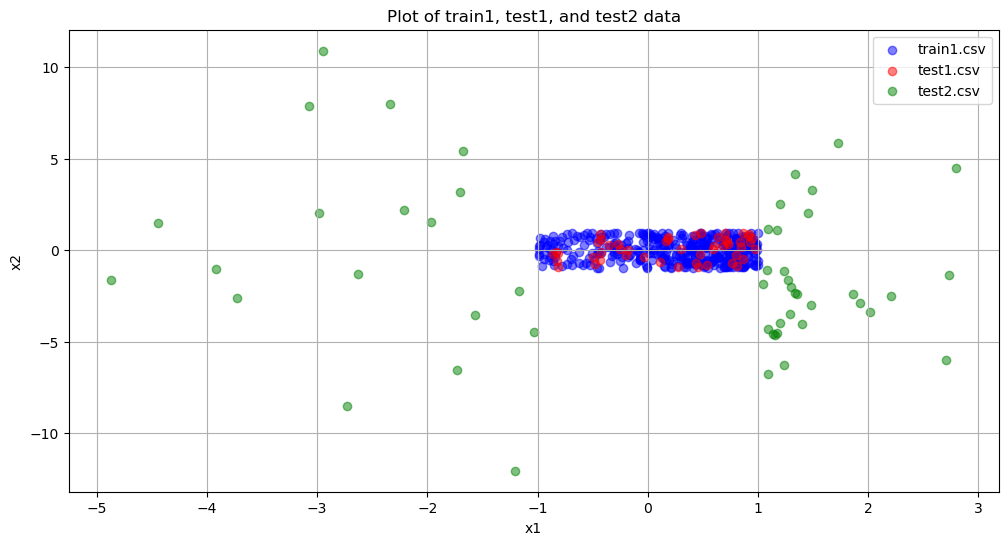

In [305]:
import pandas as pd

# get data from csv files
test1 = pd.read_csv('data/test1.csv')
test2 = pd.read_csv('data/test2.csv')
train1 = pd.read_csv('data/train1.csv')

x_test1 = test1.iloc[:, :5].values
x_test2 = test2.iloc[:, :5].values
x_train1 = train1.iloc[:, :5].values


# scatter plot of x_train1, x_test1, and x_test2
plt.figure(figsize=(12, 6))
plt.scatter(x_train1[:, 0], x_train1[:, 1], c='blue', label='train1.csv', alpha=0.5)
plt.scatter(x_test1[:, 0], x_test1[:, 1], c='red', label='test1.csv', alpha=0.5)
plt.scatter(x_test2[:, 0], x_test2[:, 1], c='green', label='test2.csv', alpha=0.5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Plot of train1, test1, and test2 data')
plt.legend()
plt.grid(True)
plt.show()

